# Praktikum Data Mining M5: Image Clustering

## Amalika Ari Anindya (164221029)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


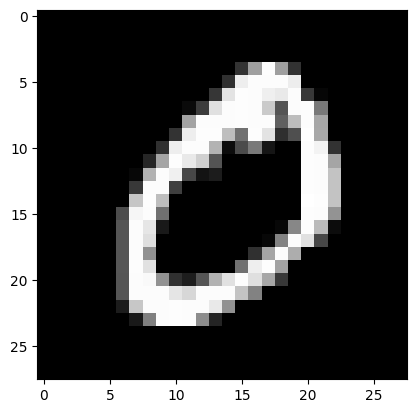

In [3]:
sample = 1
image = X_train[sample]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

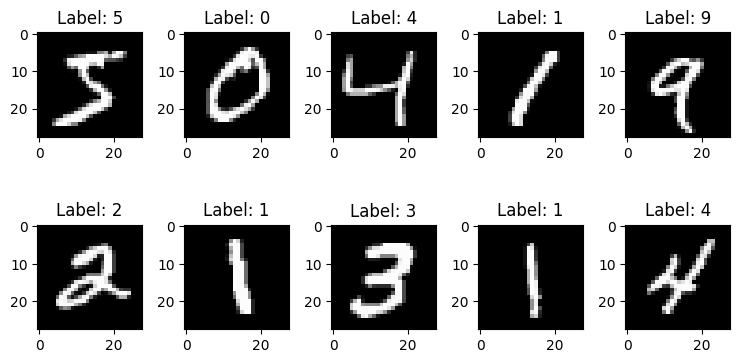

In [4]:
num = 10
images = X_train[:num]
labels = y_train[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Label: {labels[i]}')

plt.tight_layout()
plt.show()

## PCA

In [72]:
np.random.seed(48)

# Mengubah gambar 28x28 menjadi vektor 784
X_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

In [73]:
print("Training data shape:", X_train_flattened.shape)
print("Test data shape:", X_test_flattened.shape)

Training data shape: (60000, 784)
Test data shape: (10000, 784)


## K-Means Clustering

### Cara 1

In [7]:
num_clusters=10

kmeans1 = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans1.fit(X_train_flattened)

y_kmeans = kmeans1.predict(X_test_flattened)

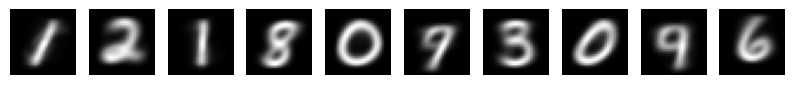

In [8]:
fig, axes = plt.subplots(1, num_clusters, figsize=(10,1))
for i, ax in enumerate(axes):
    ax.imshow(kmeans1.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    
plt.show()

In [9]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_test_flattened, y_kmeans)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0606


In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_test, y_kmeans)
nmi = normalized_mutual_info_score(y_test, y_kmeans)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info: {score:.4f}")

Adjusted Rand Index: 0.3667
Normalized Mutual Info: 0.0606


## Cara 2

For n_clusters = 2, the silhouette score is 0.5614
For n_clusters = 3, the silhouette score is 0.5917
For n_clusters = 4, the silhouette score is 0.4991
For n_clusters = 5, the silhouette score is 0.4330
For n_clusters = 6, the silhouette score is 0.3385
For n_clusters = 7, the silhouette score is 0.3438
For n_clusters = 8, the silhouette score is 0.3517
For n_clusters = 9, the silhouette score is 0.3503
For n_clusters = 10, the silhouette score is 0.3394


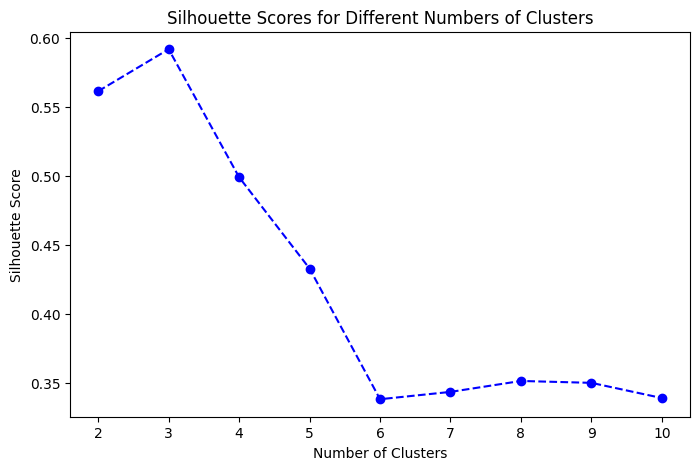

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

X_test_flattened, y_test = make_blobs(n_samples=300, cluster_std=1, random_state=12)

# Test different numbers of clusters (1 to 10)
silhouette_scores = []
num_clusters_range = range(2, 11)

for n_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_test_flattened)
    
    # Calculate silhouette score
    score = silhouette_score(X_test_flattened, cluster_labels)
    silhouette_scores.append(score)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score:.4f}")

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

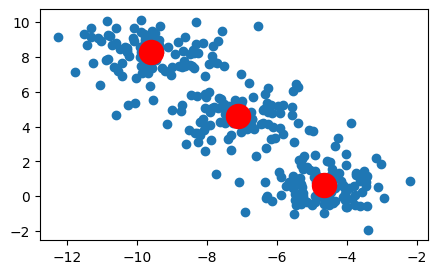

In [14]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

kmeans = KMeans(n_clusters=3, n_init=10)
pred_y = kmeans.fit_predict(X_test_flattened)
X_test_flattened, y_test = make_blobs(n_samples=300, cluster_std=1, random_state=12)
plt.figure(figsize=(5,3))
plt.scatter(X_test_flattened[:, 0], X_test_flattened[:, 1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()

In [15]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_test_flattened, pred_y)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5917


In [16]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_test, pred_y)
nmi = normalized_mutual_info_score(y_test, pred_y)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Info: {score:.4f}")

Adjusted Rand Index: 0.9605
Normalized Mutual Info: 0.5917


### Cara 3

Bentuk label kluster: (10000,)


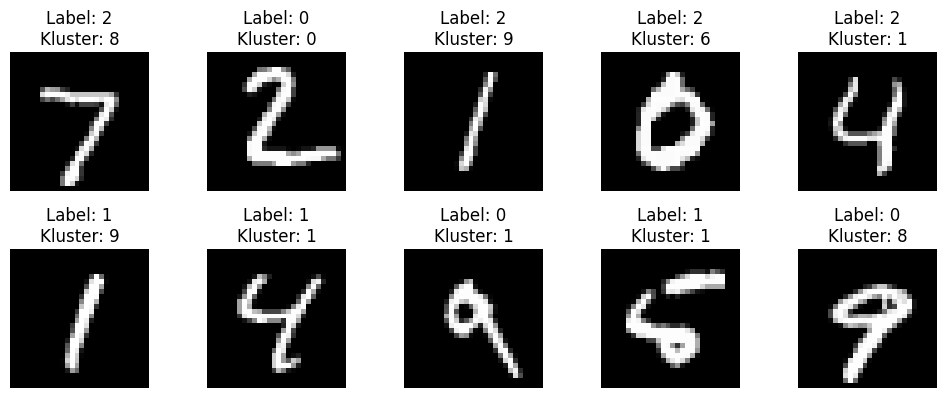

In [74]:
# Terapkan PCA untuk mengurangi dimensi, misalnya menjadi 50 komponen utama
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

# Terapkan clustering K-Means pada data yang sudah dikurangi dimensinya
kmeans2 = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans2.fit(X_train_pca)

# Prediksi label kluster untuk data pengujian yang sudah diubah dengan PCA
cluster_labels = kmeans2.predict(X_test_pca)

# Cetak bentuk dari label kluster
print("Bentuk label kluster:", cluster_labels.shape)

# Fungsi untuk menampilkan gambar beserta label kluster
def plot_images_with_clusters(images, labels, clusters, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}\nKluster: {clusters[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot 10 gambar pengujian dengan label klusternya
plot_images_with_clusters(X_test, y_test, cluster_labels)

In [75]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_test_pca, cluster_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0880


## Hierarchical Clustering

In [47]:
# Reduce the data size to avoid memory issues
subset_size = 1000
X_train_subset = X_train_pca[:subset_size]

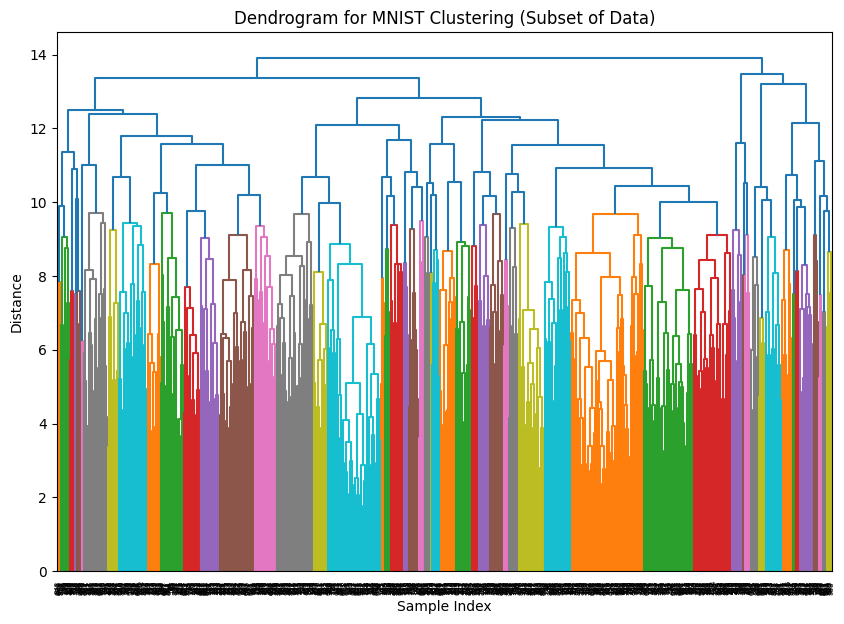

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_train_subset, method='complete') # metode complete, average, atau ward

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for MNIST Clustering (Subset of Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

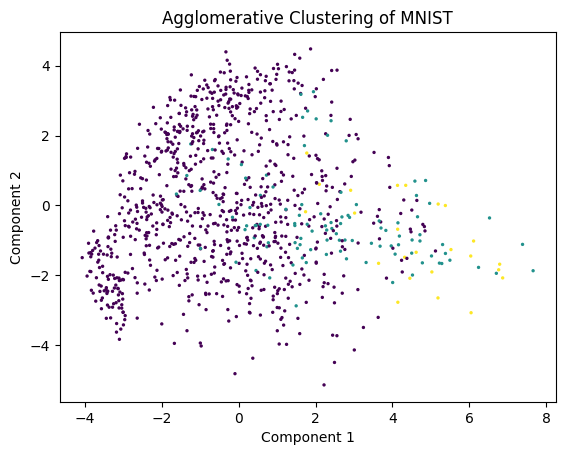

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
y_cluster = cluster.fit_predict(X_train_subset)

plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_cluster, cmap='viridis', s=2)
plt.title('Agglomerative Clustering of MNIST')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [45]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_train_subset, y_cluster)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1087


## DBScan

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Try different values of eps and min_samples
eps_values = [1,2,3,4,5,6,7,8,9,10]
min_samples_values = [5, 10, 20] 

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_train_subset)

        # Count clusters and noise points
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        if n_clusters > 1:
            print(f"eps: {eps}, min_samples: {min_samples}")
            print(f"Estimated number of clusters: {n_clusters}")
            print(f"Estimated number of noise points: {n_noise}")
        
            score = silhouette_score(X_train_subset, cluster_labels)
            print(f"Silhouette Score: {score:.4f}")

eps: 2, min_samples: 5
Estimated number of clusters: 3
Estimated number of noise points: 953
Silhouette Score: -0.0878
eps: 3, min_samples: 5
Estimated number of clusters: 4
Estimated number of noise points: 873
Silhouette Score: -0.0956
eps: 3, min_samples: 10
Estimated number of clusters: 2
Estimated number of noise points: 907
Silhouette Score: -0.0266
eps: 4, min_samples: 5
Estimated number of clusters: 10
Estimated number of noise points: 626
Silhouette Score: -0.0836
eps: 4, min_samples: 10
Estimated number of clusters: 6
Estimated number of noise points: 795
Silhouette Score: -0.0931
eps: 5, min_samples: 5
Estimated number of clusters: 8
Estimated number of noise points: 287
Silhouette Score: -0.0097
eps: 5, min_samples: 10
Estimated number of clusters: 5
Estimated number of noise points: 417
Silhouette Score: 0.0102
eps: 5, min_samples: 20
Estimated number of clusters: 3
Estimated number of noise points: 594
Silhouette Score: 0.0083
eps: 6, min_samples: 10
Estimated number of c

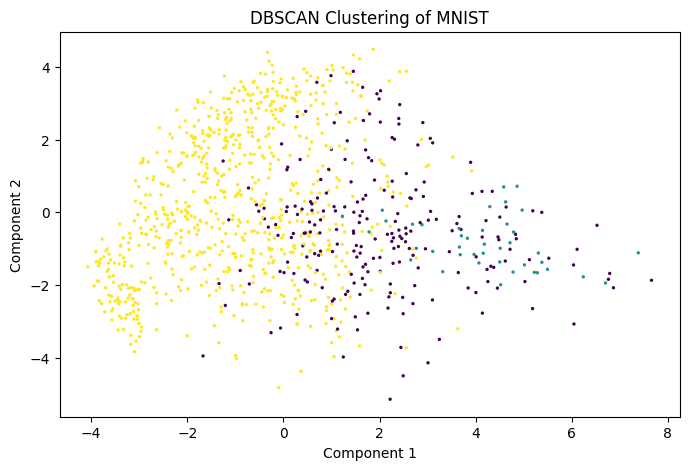

In [57]:
dbscan = DBSCAN(eps=6, min_samples=20)
dbscan_labels = dbscan.fit_predict(X_train_subset)

plt.figure(figsize=(8, 5))
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=dbscan_labels, cmap='viridis', s=2)
plt.title('DBSCAN Clustering of MNIST')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [58]:
# Evaluate the clustering
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

Estimated number of clusters: 2
Estimated number of noise points: 222


In [59]:
# Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_train_subset, dbscan_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0967
